Εργασία στην Επιχειρηματική Ευφυία

"Εξόρυξη γνώσης από δεδομένα συναλλαγών καταστήματος λιανικής"

από τον Ασημάκη Κύδρο

In [1]:
fullname = 'Ασημάκης Κύδρος'
AEM = 3881
email = 'asimakis@csd.auth,gr'

Εισαγωγή δεδομένων

In [2]:
import numpy as np
import pandas as pd
# IMPORTANT: this file needs to be manually insterted into the notebook each time
data = pd.read_csv('GroceriesInitial.csv')

# test that the file was read properly
data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Άσκηση 1:

Με μια γρήγορη ματιά στα "ωμά" δεδομένα μας παρατηρούμε πως φέρουν λογικά λάθη:

1. υπάρχει παντού η τιμή NaN
2. η τιμή basket_value δεν είναι διακριτή
3. υπάρχουν είδη δεδομένων που δεν μας ενδιαφέρουν

Προτού μπορέσουμε να τα αξιοποιήσουμε, πρέπει να τα μετασχηματίσουμε σε πιο σωστές και πιο χρήσιμες μορφές. Καταρχάς αλλάζουμε τον δεδομένο πίνακα, ώστε η τιμή basket_value να γίνει διακριτή και όλα τα αντικείμενα του καλαθιού να βρίσκονται σε μια στήλη. Αυτά λύνουν και τα 3 παραπάνω προβλήματα.

Παρακάτω, η τιμή basket_value γίνεται διακριτή υποθέτοντας ότι το πρώτο 1/3 της ταξινομημένης στήλης συνεχών τιμών basket_values αντιπροσωπεύει την low_value_basket τιμή, το επόμενο 1/3 την medium_value_basket και το υπόλοιπο την high_value_basket. Έτσι, αντιστοιχίζουμε τις τιμές στην πραγματική στήλη συνεχών τιμών ανάλογα.

Η ομαδοποίηση των αντικειμένων του καλαθιού γίνεται παίρνοντας όλο το κομμάτι της κάθε γραμμής που αφορά προϊόντα και περνώντας το από ένα "κόσκινο", που φιλτράρει την είσοδο και επιστρέφει την τομή της με το σύνολο των προϊόντων που μας ενδιαφέρει.

In [3]:
# split basket values into three discrete categories/classes:
# low_value_basket, medium_value_basket, high_value_basket
# make it so these classes have about the same amount of elements
basket_vals = data['basket_value'].tolist()
basket_vals.sort()
target_length = len(basket_vals) // 3
lows = basket_vals[:target_length]
meds = basket_vals[target_length: 2 * target_length]
highs = basket_vals[2 * target_length:]
classifications = [
    'high_value_basket' if value in highs else
    'medium_value_basket' if value in meds else
    'low_value_basket' for value in data['basket_value']
]
# we only care about 13 of the 170 products shown in the sheet
# we will need to remove most of them
products_sieve = {
    'citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate',
    'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream'
}
# we can now filter each listing by checking if it exists inside the above set, and iff it does insert it
# this approach also rules out any NaN's automatically
def filter(products: list[str]) -> list[str]:
    return [product for product in products if product in products_sieve]

# use the above to simplify the dataframe into 3 columns, with discrete basket values and no NaNs
# i chose not to use the id column as the indeces of the dataframe serve the same purpose
df = pd.DataFrame()
df['recency days'] = data['recency_days']
df['basket value'] = classifications
df['items'] = [filter([item for item in row[3:]]) for _, row in data.iterrows()]
df.head()

,recency days,basket value,items
0,2,low_value_basket,[citrus fruit]
1,31,medium_value_basket,"[tropical fruit, yogurt]"
2,7,low_value_basket,[whole milk]
3,7,high_value_basket,[yogurt]
4,66,low_value_basket,"[other vegetables, whole milk]"


Ας σημειωθεί πως το δεδομένο id δεν χρησιμοποιήθηκε, διότι ο πίνακας προσφέρει built-in indexing που πετυχγαίνει τον ίδιο σκοπό.

''Καθαρίσαμε'' τα προϊόντα μας, αλλά η παραπάνω μορφή δεν είναι πάντα τόσο χρήσιμη. Αξίζει να τα καταγράψουμε και σε δυαδική μορφή συναλλαγών, δηλαδή να τα κάνουμε hot encode. 

Το επιτυγχάνουμε δημιουργώντας ένα καινούριο πίνακα, που έχει ως στήλες όλες τις τιμές που μας ενδιαφέρουν ξεχωριστά, δηλαδή όλες οι διακριτές τιμές του basket_value, καθώς και όλα τα προϊόντα που μας ενδιαφέρουν ορίζουν από μια στήλη. Μετέπειτα, για κάθε γραμμή, κάθε κελί παίρνει τιμή αληθείας σε σχέση με το αν η στήλη ανήκει στον προηγούμενο πίνακα.

Για τις ανάγκες της άσκησης, δημιουργούμε 2 τέτοιους πίνακες, ένας που ασχολείται μόνο με τα προϊόντα και ένας που ενσωματώνει και τις διακριτές τιμές της basket_values.

In [4]:
bft = pd.DataFrame()  # dataframe with all info
bft_only_items = pd.DataFrame()  # dataframe with only item info
# make each discrete basket value into a column
# and encode it as usual
list_low = []
list_med = []
list_high = []
for category in df['basket value']:
    list_low.append(int(category == 'low_value_basket'))
    list_med.append(int(category == 'medium_value_basket'))
    list_high.append(int(category == 'high_value_basket'))
bft['low value'] = list_low
bft['medium value'] = list_med
bft['high value'] = list_high

# make each product-item into a column 
# so it can be encoded into all baskets
for item in products_sieve:
    __list = [int(item in basket) for basket in df['items']]
    bft[item] = __list
    bft_only_items[item] = __list

Έχουμε, έτσι, δύο καινούριους δυαδικούς πίνακες, που εκφράζουν την ίδια πληροφορία με παραπάνω (με διαφορετικό τρόπο), και θα φανούν χρήσιμοι παρακάτω:

In [5]:
bft.head()

,low value,medium value,high value,yogurt,citrus fruit,other vegetables,whole milk,rolls/buns,cream,tropical fruit,pastry,sausage,root vegetables,chocolate,bottled water,soda
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [6]:
bft_only_items.head()

,yogurt,citrus fruit,other vegetables,whole milk,rolls/buns,cream,tropical fruit,pastry,sausage,root vegetables,chocolate,bottled water,soda
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0


Άσκηση 2:

Το ξεκαθάρισμα των δεδομένων μας επιτρέπει να προχωρήσουμε σε μάθηση κανόνων συσχέτισης μεταξύ των προϊόντων και της αξίας των καλαθιών.

Για να πετύχουμε το παραπάνω, θα χρησιμοποιήσουμε την μέθοδο Apriori. Χρησιμοποιήθηκε η υλοποίηση των notebooks του eLearning.

In [7]:
from collections import defaultdict
from itertools import chain, combinations

def getUnion(itemSet, length):
    return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])

def pruning(candidateSet, prevFreqSet, length):
    tempCandidateSet = candidateSet.copy()
    for item in candidateSet:
        subsets = combinations(item, length)
        for subset in subsets:
            # if the subset is not in previous K-frequent get, then remove the set
            if(frozenset(subset) not in prevFreqSet):
                tempCandidateSet.remove(item)
                break
    return tempCandidateSet

def getAboveMinSup(itemSet, itemSetList, minSup, globalItemSetWithSup):
    freqItemSet = set()
    localItemSetWithSup = defaultdict(int)

    for item in itemSet:
        for itemSet in itemSetList:
            if item.issubset(itemSet):
                globalItemSetWithSup[item] += 1
                localItemSetWithSup[item] += 1

    for item, supCount in localItemSetWithSup.items():
        support = float(supCount / len(itemSetList))
        if(support >= minSup):
            freqItemSet.add(item)

    return freqItemSet

def associationRule(freqItemSet, itemSetWithSup, minConf):
    rules = []
    for k, itemSet in freqItemSet.items():
        for item in itemSet:
            subsets = powerset(item)
            for s in subsets:
                confidence = float(
                    itemSetWithSup[item] / itemSetWithSup[frozenset(s)])
                if(confidence > minConf):
                    rules.append([set(s), set(item.difference(s)), confidence])
    return rules

def getItemSetFromList(itemSetList):
    tempItemSet = set()

    for itemSet in itemSetList:
        for item in itemSet:
            tempItemSet.add(frozenset([item]))

    return tempItemSet

def powerset(s):
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)))


def apriori(itemSetList, minSup, minConf):
    C1ItemSet = getItemSetFromList(itemSetList)
    # Final result, global frequent itemset
    globalFreqItemSet = dict()
    # Storing global itemset with support count
    globalItemSetWithSup = defaultdict(int)

    L1ItemSet = getAboveMinSup(C1ItemSet, itemSetList, minSup, globalItemSetWithSup)
    currentLSet = L1ItemSet
    k = 2

    # Calculating frequent item set
    while(currentLSet):
        # Storing frequent itemset
        globalFreqItemSet[k-1] = currentLSet
        # Self-joining Lk
        candidateSet = getUnion(currentLSet, k)
        # Perform subset testing and remove pruned supersets
        candidateSet = pruning(candidateSet, currentLSet, k-1)
        # Scanning itemSet for counting support
        currentLSet = getAboveMinSup(candidateSet, itemSetList, minSup, globalItemSetWithSup)
        k += 1

    rules = associationRule(globalFreqItemSet, globalItemSetWithSup, minConf)
    rules.sort(key=lambda x: x[2], reverse=True)

    return globalFreqItemSet, rules

Ορίζουμε και τις παρακάτω βοηθητικές συναρτήσεις, προκειμένου να δημιουργούμε γρήγορα το expected input για τον apriori για πολλαπλές στήλες του πίνακα, και να τυπώνουμε με όμορφο τρόπο τους παραγόμενους κανόνες στην οθόνη.

Το αναμενόμενο format για κανόνα [{lhs}, {rhs}, {conf}] είναι {lhs} ---> {rhs} (percentage(conf))

In [8]:
def print_rules(__rules: list, __amount: int = -1):
    for rule in __rules:
        # stop early if we only want a certain amount of rules
        if __amount == 0:
            return
        left_hand_side = rule[0]
        right_hand_side = rule[1]
        # dont bother with {} -> {something} or {something} -> {} rules
        if len(left_hand_side) == 0 or len(right_hand_side) == 0:
            continue
        conf = round(rule[2] * 100, 2)
        print('{} ---> {} ({}%)'.format(left_hand_side, right_hand_side, conf))
        __amount -= 1

In [9]:
def zip2list(__list1: list[list], __list2: list) -> list:
    ret = __list1
    for i, value in enumerate(__list2):
        ret[i] = [value] + ret[i]
    return ret

Ας δημιουργήσουμε αρχικά κανόνες που αφορούν μόνο τα προϊόντα. Για support = 5%,
βλέπουμε πως οι πιο έμπιστοι κανόνες είναι οι εξείς:

In [10]:
# top 20 rules based on confidence only concerning items
dummy, rules_oi = apriori(df['items'], 0.05, 0)
print_rules(rules_oi, 20)

{'root vegetables'} ---> {'whole milk'} (44.87%)
{'root vegetables'} ---> {'other vegetables'} (43.47%)
{'tropical fruit'} ---> {'whole milk'} (40.31%)
{'yogurt'} ---> {'whole milk'} (40.16%)
{'other vegetables'} ---> {'whole milk'} (38.68%)
{'yogurt'} ---> {'other vegetables'} (31.12%)
{'rolls/buns'} ---> {'whole milk'} (30.79%)
{'whole milk'} ---> {'other vegetables'} (29.29%)
{'other vegetables'} ---> {'root vegetables'} (24.49%)
{'rolls/buns'} ---> {'other vegetables'} (23.16%)
{'soda'} ---> {'whole milk'} (22.97%)
{'other vegetables'} ---> {'yogurt'} (22.44%)
{'whole milk'} ---> {'rolls/buns'} (22.16%)
{'other vegetables'} ---> {'rolls/buns'} (22.02%)
{'soda'} ---> {'rolls/buns'} (21.98%)
{'whole milk'} ---> {'yogurt'} (21.93%)
{'rolls/buns'} ---> {'soda'} (20.84%)
{'whole milk'} ---> {'root vegetables'} (19.14%)
{'whole milk'} ---> {'tropical fruit'} (16.55%)
{'whole milk'} ---> {'soda'} (15.68%)


Πάνω κάτω βλέπουμε πως όλες συνδυάζουν προϊόντα που συσχετίζονται διαισθητικά μεταξύ τους. Η πιο, ίσως, ασυνήθιστη συναλλαγή μπορούμε να πούμε πως είναι η
                 
    {'soda'} <---> {'whole milk'}

Κυρίως γιατί δεν είναι αμέσως προφανές το πως συνδέονται. Ίσως η συναλλαγές αυτές να έγιναν σε πολύ ζεστές μέρες και να δικαιολογείται έτσι η δίψα.

Ας εισάγουμε τώρα και την διακριτοποιημένη αξία του καλαθιού στην παραγωγή κανόνων. Για το ίδιο support, οι πιο έμπιστοι κανόνες τώρα είναι:

In [11]:
# top 20 rules based on confidence concerning both items and discrete basket values
dummy, rules_all = apriori(zip2list(list(df['items']), list(df['basket value'])), 0.05, 0)
print_rules(rules_all, 20)

{'sausage'} ---> {'high_value_basket'} (87.55%)
{'pastry'} ---> {'high_value_basket'} (71.66%)
{'yogurt', 'whole milk'} ---> {'high_value_basket'} (69.51%)
{'whole milk', 'other vegetables'} ---> {'high_value_basket'} (62.91%)
{'tropical fruit'} ---> {'high_value_basket'} (59.59%)
{'root vegetables'} ---> {'high_value_basket'} (55.6%)
{'yogurt'} ---> {'high_value_basket'} (54.66%)
{'citrus fruit'} ---> {'high_value_basket'} (51.72%)
{'yogurt', 'high_value_basket'} ---> {'whole milk'} (51.07%)
{'other vegetables'} ---> {'high_value_basket'} (50.45%)
{'rolls/buns'} ---> {'high_value_basket'} (49.59%)
{'other vegetables', 'high_value_basket'} ---> {'whole milk'} (48.23%)
{'whole milk'} ---> {'high_value_basket'} (45.88%)
{'root vegetables'} ---> {'whole milk'} (44.87%)
{'high_value_basket'} ---> {'whole milk'} (44.76%)
{'soda'} ---> {'high_value_basket'} (43.56%)
{'root vegetables'} ---> {'other vegetables'} (43.47%)
{'bottled water'} ---> {'high_value_basket'} (41.67%)
{'tropical fruit'}

Βλέπουμε πως το λουκάνικο και τα γλυκά εμφανίζονται αρκετά συχνά σε καλάθια μεγάλης αξίας. Επομένως μπορούμε να υποθέσουμε ότι αποτελούν από τα πιο ακριβά προϊόντα, με το λουκάνικο να είναι λογικά το πιο ακριβό.

Άσκηση 3:

Μπορούμε να ομαδοποιήσουμε τα δεδομένα με βάση την αξία και το πόσο προσορινή είναι κάθε συναλλαγή χρησιμοποιώντας τα συνεχή χαρακτηριστικά basket_value και recency_days για k-clustering.

Το πετυγχαίνουμε χρησιμοποιώντας τον αλγόριθμο KMeans. Φτιάχνουμε μια λίστα ζευγών (basket_value, recency_days) (προφανώς αντίστοιχες τιμές σε κάθε ζεύγος) και τα περνάμε στον αλγόριθμο της python.  

Λαμβάνουμε, έτσι, τις παρακάτω 5 ομάδες:

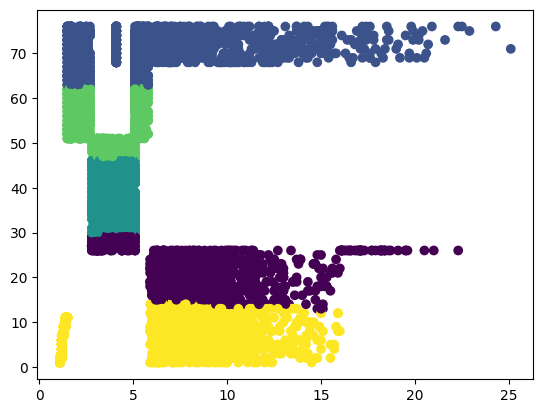

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# make pairs of basket value and recency days based on the data given in each row
bv = list(data['basket_value'])
rd = list(data['recency_days'])
transaction_pairs = list(zip(bv, rd))

# create the kmeans model and feed it the above pairs
kmeans = KMeans(n_clusters=5, init='random',  n_init='auto', random_state=42)
clusters = kmeans.fit_predict(transaction_pairs)

# visualize results
plt.scatter(bv, rd, c=kmeans.labels_)
plt.show()

Μπορούμε να εκφράσουμε την κάθε ομάδα με βάση την μέση απόκλισή της, δηλαδή την απόκλιση του κέντρου της από το μέσο όλων των κεντροϊδών.

In [13]:
centroids_mean = [
    np.mean([centroid[0] for centroid in kmeans.cluster_centers_]),
    np.mean([centroid[1] for centroid in kmeans.cluster_centers_]),
]
centroids_std = [
    np.std([centroid[0] for centroid in kmeans.cluster_centers_]),
    np.std([centroid[1] for centroid in kmeans.cluster_centers_]),
]
print('Mean of centroids: {}'.format(centroids_mean))
print('Standard deviation: {}\n'.format(centroids_std))
for index, centroid in enumerate(kmeans.cluster_centers_):
    print('Cluster {} centered at {}'.format(index + 1, centroid))

Mean of centroids: [4.9886439500731825, 38.4621423148414]
Standard deviation: [1.6631044543320346, 22.576341054988927]

Cluster 1 centered at [ 7.83168317 22.2549505 ]
Cluster 2 centered at [ 5.42163009 70.54179728]
Cluster 3 centered at [ 3.87404959 38.02479339]
Cluster 4 centered at [ 2.91268462 54.59165943]
Cluster 5 centered at [4.90317228 6.89751098]


Από τα παραπάνω, εξάγουμε τους παρακάτω χαρακτηρισμούς για τις ομάδες:

* Cluster 1: Ομάδα συναλλαγών μεγάλης αξίας  που έγιναν σχετικά πρόσφατα.
* Cluster 2: Ομάδα συναλλαγών αυξημένης αξίας που έγιναν πολύ παλιά.
* Cluster 3: Ομάδα συναλλαγών μειωμένης αξίας που έγιναν σε μέσο χρονικό διάστημα.
* Cluster 4: Ομάδα συναλλαγών μικρής αξίας που έγιναν αρκετά παλιά.
* Cluster 5: Ομάδα συναλλαγών μέσης αξίας που έγιναν πολύ πρόσφατα.

Η ομάδες 1 και 2 έχουν ένα ενδιαφέρον, διότι η 1 καλύπτει συναλλαγές πολύ ακριβές σε σύγκριση με τις υπόλοιπες ομάδες, και η 2 καλύπτει συναλλαγές ανεβασμένης ξανά αξίας που έγιναν μήνες πριν. Η ομάδα Μαρκετινγκ θα μπορούσε να ερευνήσει τους λόγους αυτών των ξαφνικών αυξήσεων στην αξία. Πιθανόν κάποιες γιορτές ή events να λάμβαναν χώρα εκείνες τις περιόδους.

Ας συμπεριλάβουμε αυτές τις επιπλέον πληροφορίες στην αναπαράσταση των δεδομένων. Αντιστοιχίζουμε την γραμμή  i του πρώτου πίνακα στην κατάλλη ομάδα ελέγχοντας την απόσταση του διανύματος (basket_value_i, recency_days_i) με όλα τα κέντρα των ομάδων και επιλέγοντας την ομάδα για της οποίας το κέντρο η παραπάνω απόσταση ελαχιστοποιείται:

In [14]:
groups = []
for pair in transaction_pairs:
    index = 0
    min_center = kmeans.cluster_centers_[0]
    for i, other in enumerate(kmeans.cluster_centers_):
        if sum(abs(other - pair)) < sum(abs(min_center - pair)):
            min_center = other
            index = i
    groups.append('Cluster' + str(index + 1))
df['cluster'] = groups
df.head()

,recency days,basket value,items,cluster
0,2,low_value_basket,[citrus fruit],Cluster5
1,31,medium_value_basket,"[tropical fruit, yogurt]",Cluster3
2,7,low_value_basket,[whole milk],Cluster5
3,7,high_value_basket,[yogurt],Cluster5
4,66,low_value_basket,"[other vegetables, whole milk]",Cluster2


θα δημιουργήσουμε και δύο νέους πίνακες δυαδικής μορφής συναλλαγών που συμπεριλαμβάνουν και τα αντίστοιχα Clusters. Αυτό γίνεται με την ίδια λογική του ορισμού των 2 προηγουμένων πινάκων hot-encoding:

In [15]:
# make copies of bft and bft_only_items that include the cluster of each transaction
items_clusters = bft_only_items.copy()
items_clusters_basket_value = bft.copy()

list_cluster1= []
list_cluster2= []
list_cluster3= []
list_cluster4= []
list_cluster5= []
for cluster in df['cluster']:
    list_cluster1.append(int(cluster == 'Cluster1'))
    list_cluster2.append(int(cluster == 'Cluster2'))
    list_cluster3.append(int(cluster == 'Cluster3'))
    list_cluster4.append(int(cluster == 'Cluster4'))
    list_cluster5.append(int(cluster == 'Cluster5'))
# add cluster data into copy of bft_only_items
items_clusters['Cluster1'] = list_cluster1
items_clusters['Cluster2'] = list_cluster2
items_clusters['Cluster3'] = list_cluster3
items_clusters['Cluster4'] = list_cluster4
items_clusters['Cluster5'] = list_cluster5
# add cluster data into copy of bft
items_clusters_basket_value['Cluster1'] = list_cluster1
items_clusters_basket_value['Cluster2'] = list_cluster2
items_clusters_basket_value['Cluster3'] = list_cluster3
items_clusters_basket_value['Cluster4'] = list_cluster4
items_clusters_basket_value['Cluster5'] = list_cluster5

In [16]:
items_clusters.head()

,yogurt,citrus fruit,other vegetables,whole milk,rolls/buns,cream,tropical fruit,pastry,sausage,root vegetables,chocolate,bottled water,soda,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
items_clusters_basket_value.head()

,low value,medium value,high value,yogurt,citrus fruit,other vegetables,whole milk,rolls/buns,cream,tropical fruit,...,sausage,root vegetables,chocolate,bottled water,soda,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Άσκηση 4:

Έχοντας και το χαρακτηριστικό των clusters μπορούμε τώρα περιγράψουμε το προϊοντικό προφιλ των ομάδων.

Το πετυχαίνουμε αυτό παράγοντας κανόνες συσχέτισης. Θα ξαναχρησιμοποιήσουμε την μέθοδο Apriori γι αυτό το σκοπό:

Αρχικά εξετάζουμε μόνο τα προϊόντα και τις ομάδες.

In [18]:
# top 20 rules based on confidence only concerning items and clusters
dummy, rules_ic = apriori(zip2list(list(df['items']), list(df['cluster'])), 0.05, 0)
print_rules(rules_ic, 20)

{'pastry'} ---> {'Cluster2'} (100.0%)
{'Cluster2'} ---> {'pastry'} (46.79%)
{'root vegetables'} ---> {'whole milk'} (44.87%)
{'Cluster1'} ---> {'whole milk'} (43.59%)
{'Cluster5'} ---> {'whole milk'} (43.49%)
{'root vegetables'} ---> {'other vegetables'} (43.47%)
{'tropical fruit'} ---> {'whole milk'} (40.31%)
{'yogurt'} ---> {'whole milk'} (40.16%)
{'other vegetables'} ---> {'whole milk'} (38.68%)
{'bottled water'} ---> {'Cluster5'} (36.61%)
{'Cluster1'} ---> {'other vegetables'} (36.11%)
{'whole milk'} ---> {'Cluster5'} (34.98%)
{'other vegetables'} ---> {'Cluster5'} (33.95%)
{'Cluster1'} ---> {'rolls/buns'} (32.42%)
{'Cluster5'} ---> {'other vegetables'} (31.96%)
{'yogurt'} ---> {'other vegetables'} (31.12%)
{'rolls/buns'} ---> {'whole milk'} (30.79%)
{'Cluster3'} ---> {'whole milk'} (30.43%)
{'whole milk'} ---> {'other vegetables'} (29.29%)
{'soda'} ---> {'Cluster2'} (29.27%)


Από τα παραπάνω βλέπουμε πως:
   * η ομάδα 1 είναι κυρίως των λαχανικών, γάλατος και ψωμιού, δηλαδή καλάθια νοικοκυριού.
   * η ομάδα 2 είναι σίγουρα των σνακ και κυρίως των γλυκών.
   * για την ομάδα 3 εμφανίζεται κυρίως το γάλα, ίσως είναι η ομάδα των γαλακτοκομικών.
   * η ομάδα 5 είναι ξανά των βασικών υλικών, κυρίως γάλατος και ψωμιού.


 Άν ρίξουμε την ελάχιστη κάλυψη, θα δούμε πως η ομάδα 1 συμπεριλαμβάνει και το λουκάνικο. Επομένως οι ομάδες 1 και 2 που θεωρήθηκαν σημαντικές λόγο υψηλής αξίας συσχετίζονται άμεσα με τα πιο ακριβά προϊόντα.

Όσο αφορά τα γλυκά, μια εκδοχή που δικαιολογεί την συχνή αγορά τους εκείνη την περίοδο θα ήταν να είναι κάποια γιορτή, πχ Πρωτοχρονιά (?).
Για το λουκάνικο μια παρόμοια εκδοχή θα ήταν να πλησίαζε Πάσχα και ο κόσμος να έψηνε.


Ας συμπεριλάβουμε τώρα και τη διακριτή τιμή του καλαθιού:

In [19]:
# top 20 rules based on confidence concerning items, clusters and basket value
icbv = zip2list(zip2list(list(df['items']), list(df['cluster'])), list(df['basket value']))
dummy, rules_icb = apriori(icbv, 0.05, 0)
print_rules(rules_icb, 20)

{'pastry'} ---> {'Cluster2'} (100.0%)
{'Cluster3'} ---> {'medium_value_basket'} (100.0%)
{'pastry', 'high_value_basket'} ---> {'Cluster2'} (100.0%)
{'whole milk', 'Cluster3'} ---> {'medium_value_basket'} (100.0%)
{'Cluster2', 'high_value_basket'} ---> {'pastry'} (97.21%)
{'sausage'} ---> {'high_value_basket'} (87.55%)
{'Cluster1', 'whole milk'} ---> {'high_value_basket'} (83.43%)
{'Cluster1'} ---> {'high_value_basket'} (80.74%)
{'low_value_basket', 'whole milk'} ---> {'Cluster5'} (72.15%)
{'pastry'} ---> {'high_value_basket'} (71.66%)
{'pastry'} ---> {'Cluster2', 'high_value_basket'} (71.66%)
{'Cluster2', 'pastry'} ---> {'high_value_basket'} (71.66%)
{'yogurt', 'whole milk'} ---> {'high_value_basket'} (69.51%)
{'whole milk', 'other vegetables'} ---> {'high_value_basket'} (62.91%)
{'tropical fruit'} ---> {'high_value_basket'} (59.59%)
{'other vegetables', 'Cluster5'} ---> {'high_value_basket'} (58.82%)
{'Cluster4'} ---> {'low_value_basket'} (58.41%)
{'root vegetables'} ---> {'high_value